## Assignment 2: Breast cancer diagnosis using a support vector machine

### 1. Introduction and formulation of the optimization problem


- Given a dataset with each datapoint representing a tumor / tissue sample, our goal is to classify these tumors as either malignant or benign
<br><br>

- This is a binary classification problem where the class labels take values in $y = \{-1, 1\}$. Each tumour, i.e. observation, is described by a feature vector $\mathbf{x_i}$ and has an associated class label $y_i$. Malignant cells are denoted by -1 and benign cells by 1 
<br><br>

- In this supervised learning problem, we learn a model that should be able to classify a new point $x_*$ using the decision function $\hat{y} \, (\mathbf{x_*}) = sign \, (w^T\mathbf{x} + b)$ which amounts to learning the parameters $w, b$ that assigns the right sign to as many previously unseen $(\mathbf{x_i}, y)$ as possible
<br><br>

- The learning model is a **Support Vector Machine**, which aims to separate the two classes using a hyperplane. The term "support vector" comes from the two vectors parallel to the decision boundary, on which the points closest to the separating hyperplane are located. These are then used to classify new points $x_*$ 

<img src="svc_example.png">
<br><br>

- To learn (optimize) the parameters of the model, we want to minimize the so called hinge loss, which is $0$ if the classified point is on the correct side of the each support vector and $>0$ otherwise: $L(\mathbf{x_i}, y_i; w) = max \{0, 1 - y_i (w^T \mathbf{x_i} + b)\}$
<br><br>

- This is equivalent to choosing a separating hyperplane that maximizes the margin between classes, i.e. the distance $d$ between the two support vectors. The hyperplane is given by $w^T \mathbf{x_i} + b = 0$ and the two support vectors by $w^T \mathbf{x_i} + b = 1$ and $w^T \mathbf{x_i} + b = -1$, respectively
<br><br>

- In a perfect scenario all datapoints belonging to each respective class are situated on their own side of the two support vectors. This would mean that the loss is equal to zero:

$$
    w^T \mathbf{x_i} + b \geq 1 \quad for \quad y_i = 1
$$
$$
    w^T \mathbf{x_i} + b \leq -1 \quad for \quad y_i = -1
$$

- However, that is (almost) never the case in reality. Therefore we need to allow points to fall on the wrong side of the support vector, and even the hyperplane. By introducing the "deviation measure" $\epsilon_i$ we can relex the constraint above and instead get:

$$
    w^T \mathbf{x_i} + b \geq 1 -\epsilon_i \quad \text{for} \quad y_i = 1
$$
$$
    w^T \mathbf{x_i} + b \leq -1 + \epsilon_i \quad \text{for} \quad y_i = -1
$$

- We penalize the model for each $\epsilon_i > 0$, scaled with the penalty strength parameter $C$
<br><br>

**To summarize, we have the following minimization problem:**

$$
    \text{minimize} \quad f(w, b) = \frac{1}{2}w^Tw + C\sum^{m}_{i=1}\epsilon_i
$$

$$
    \text{subject to} \quad y_i(w^Tx_i+ b) \geq 1 - \epsilon_i, \quad i = 1...m, \quad \epsilon_i \geq 0
$$

### 2. Load and visualize data set

Column 1 contains the class labels (1 if the tumour is benign, -1 if it's malignant). The other columns contain different properties of the studied tissue.

In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
#import jupyter_black

#jupyter_black.load()
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [11]:
# Load dataframe with breast cancer data
columns = list(np.arange(0, 32, 1))
df = pd.read_csv("wdbc.data.csv", names=columns)


# Encode class column as -1 / 1 to fit SVM algorithm
# -1 is malignant and 1 is benign
df[1] = np.where(df[1] == "M", -1, 1)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We create a few pair-wise plots of the different features to get a sense of how the data is distributed. The more separated the two classes are, the easier the classification task will be.

Red observations are malignant, and green are benign.

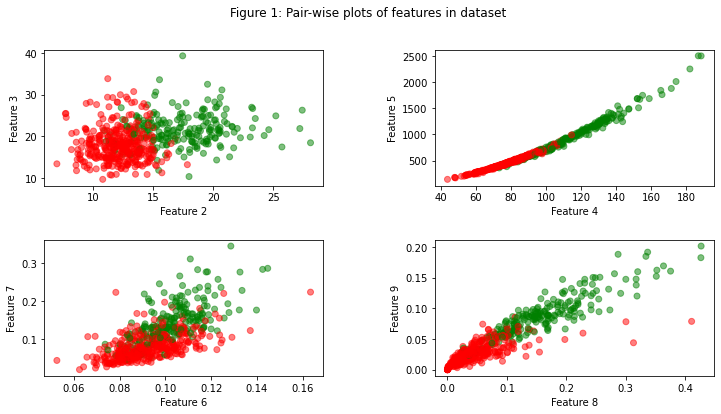

In [12]:
# Create pair-wise plots of some of the attributes of the tumours

# Create plot
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

colors = ["green", "red"]
fig.suptitle("Figure 1: Pair-wise plots of features in dataset", fontsize=12)


# Plot a number of pairwise features
axes[0, 0].scatter(
    df[2], df[3], c=df[1], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5
)
axes[0, 0].set(xlabel="Feature 2", ylabel="Feature 3")

axes[0, 1].scatter(
    df[4], df[5], c=df[1], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5
)
axes[0, 1].set(xlabel="Feature 4", ylabel="Feature 5")

axes[1, 0].scatter(
    df[6], df[7], c=df[1], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5
)
axes[1, 0].set(xlabel="Feature 6", ylabel="Feature 7")

axes[1, 1].scatter(
    df[8], df[9], c=df[1], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5
)
axes[1, 1].set(xlabel="Feature 8", ylabel="Feature 9")

# for ax in axes.flat:
# ax.set_tick_params(labelsize=10)
# axes[0, 0].legend(["Malignant", "Benign"], fontsize=8)

print()
plt.show()

### 3. Set up the SVM code to solve the problem

We create a class for the SVM classifier as a wrapper around the optimization code, to make it more organized. It consists of the following methods

- **setup_data_arrays:** Creates an initializes arrays for $w$ and $b$
<br><br>
- **calculate_value_per_obs:** Calculates $y_i (w^T \mathbf{x_i} + b)$ for every training observation
<br><br>
- **calculate_epsilon:** Calculates $\epsilon_i$ for each training observations
<br><br>
- **objective_function:** The function that we are minimizing, i.e. $\frac{1}{2}w^Tw + C\sum^{m}_{i=1}\epsilon_i$
<br><br>
- **constraint_function:** The constraint that needs to be satisfied for each point, i.e. $y_i(w^Tx_i+ b) \geq 1 - \epsilon_i, \quad i = 1...m, \quad \epsilon_i \geq 0$
<br><br>
- **fit_model:** Trains the model on the data, that is, runs the optimization algorithm
<br><br>
- **predict:** Use the support vectors from the trained model to make predictions for new data

In [13]:
import numpy as np
from scipy import optimize


class SupportVectorClassifier:
    def __init__(
        self, solver="SLSQP", penalty=1000, max_iter=1000, print_opt_report=True
    ):

        # Store hyperparameters
        self.C = penalty
        self.solver = solver
        self.max_iter = max_iter
        self.print_opt_report = print_opt_report

        # Placeholder attributes for data
        self.X = None
        self.Y = None
        self.Y_triang = None
        self.b = None

        # Output attributes
        self.final_W = None

    def setup_data_arrays(self):

        # Create 30 x 1 weight vector with initial weights
        # Also create 569 x 1 intercept / bias vector with initial value
        W = np.random.normal(loc=0, scale=0.1, size=self.X.shape[0])
        self.b = np.ones(self.X.shape[1])

        # Transform class label vector into triangular matrix with labels on diagonal
        self.Y_triang = np.zeros((self.X.shape[1], self.X.shape[1]))
        np.fill_diagonal(self.Y_triang, self.Y)

        return W

    def calculate_value_per_obs(self, W):

        # Predicted value for each x_i with current weights, times actual class label
        pred_actual_val = (W.T @ self.X + self.b) @ self.Y_triang

        return pred_actual_val

    def calculate_epsilon(self, W):

        # Predicted value for each x_i with current weights, times actual class label
        pred_actual_val = self.calculate_value_per_obs(W)

        # Epsilon value for each x_i on the wrong side of support vector
        epsilon_vec = np.where(pred_actual_val < 1, 1 - pred_actual_val, 0)

        return epsilon_vec

    def objective_function(self, W):

        # Call function to calculate current epsilon vector
        epsilon_vec = self.calculate_epsilon(W)

        # Calculate value of function for current weights and deviations
        function_val = 0.5 * (W.T @ W) + self.C * np.sum(epsilon_vec)

        return function_val

    def constraint_function(self, W):

        # Call function to calculate value per observation
        pred_actual_val = self.calculate_value_per_obs(W)

        # Call function to calculate current epsilon vector
        epsilon_vec = self.calculate_epsilon(W)

        # Difference between these
        constraint = pred_actual_val - 1 + epsilon_vec

        return constraint

    def fit_model(self, x_train, y_train):

        # Store data passed to the function
        self.X = x_train.T
        self.Y = y_train

        # Set up the required arrays
        W = self.setup_data_arrays()

        # Run optimization
        epsilon_cons = {"type": "ineq", "fun": self.constraint_function}

        optim = optimize.minimize(
            fun=self.objective_function,
            x0=W,
            method=self.solver,
            constraints=epsilon_cons,
            options={"maxiter": self.max_iter},
        )

        self.final_W = optim.x

        if self.print_opt_report:
            print("Output report for scipy.optimize.minimize \n")
            print(f"Solver: {self.solver}")
            print(f"Penalty (C): {self.C} \n")
            print("Results: \n")
            print(optim)

    def predict(self, x_test):

        # Need to add b vector
        x_test = x_test.T
        values = self.final_W @ x_test
        predictions = np.where(values >= 0, 1, -1)

        return predictions

### 4. Train the classifier and make predictions

In [14]:
# Set up training and test data

# Shuffle data randomly
df_shuffled = df.sample(frac=1)

# Class labels
y_data = df_shuffled[1].to_numpy()
y_train = y_data[:500]
y_test = y_data[500:]

# Features
x_data = df_shuffled.drop(columns=[0, 1]).to_numpy()

# Perform normalization to speed up computations
x_data = Normalizer().fit_transform(x_data)

x_train = x_data[:500]
x_test = x_data[500:]

In [15]:
# Fit the model and make predictions

# Instantiate model object with parameters
svc = SupportVectorClassifier(solver="SLSQP", penalty=1000, max_iter=1000)

# Train the model
svc.fit_model(x_train, y_train)

# Make predictions on train and test sets
pred_test = svc.predict(x_test)
pred_train = svc.predict(x_train)

Output report for scipy.optimize.minimize 

Solver: SLSQP
Penalty (C): 1000 

Results: 

     fun: 93002.24125269403
     jac: array([ 1.37421875e+01,  1.22958984e+01,  8.70166016e+01,  6.27225586e+02,
        9.47265625e-02,  6.25000000e-02,  6.34765625e-02,  4.29687500e-02,
        1.55273438e-01,  4.29687500e-02,  8.10546875e-02,  4.39453125e-02,
       -1.10351562e-01,  6.49316406e+00,  0.00000000e+00, -4.88281250e-03,
        8.78906250e-03,  7.81250000e-03,  2.05078125e-02, -9.76562500e-04,
        1.47187500e+01,  1.42099609e+01,  9.12353516e+01,  7.16931641e+02,
        1.24023438e-01,  1.13281250e-01,  2.00195312e-01,  1.28906250e-01,
        1.86523438e-01,  6.44531250e-02])
 message: 'Optimization terminated successfully'
    nfev: 2834
     nit: 88
    njev: 88
  status: 0
 success: True
       x: array([ 2.80582299e+01,  7.57375351e+00,  8.27672405e+01,  5.29557369e+00,
       -4.80843538e-01, -2.64169111e+00, -3.93342165e+00, -1.67112086e+00,
       -6.93664954e-01, -1.08

### 5. Evaluate model performance

We evaluate how the model performs on the data using the following metrics

- **Accuracy:** Share of correctly classified observations (both malignant and benign)
<br><br>
- **Precision:** Share of malignant cells correctly diagnosed as cancer
<br><br>
- **Sensitivity:** Share of benign cells correctly diagnosed 

In [16]:
# Evaluate accuracy of predictions

test_accuracy = np.mean(pred_test == y_test)
train_accuracy = np.mean(pred_train == y_train)

print(f"Test accuracy: {round(test_accuracy, 3)}")
print(f"Train accuracy: {round(train_accuracy, 3)}")

Test accuracy: 0.928
Train accuracy: 0.88


In [17]:
# Calculate sensitivity and specificity

df_eval = pd.DataFrame(pred_test).rename(columns={0: "y_pred"})
df_eval = pd.concat([df_eval, pd.Series(y_test)], axis="columns").rename(
    columns={0: "y_true"}
)

sensitivity = (
    df_eval.loc[(df_eval["y_true"] == -1) & (df_eval["y_pred"] == df_eval["y_true"])][
        "y_pred"
    ].count()
    / df_eval.loc[df_eval["y_true"] == -1]["y_pred"].count()
)

specificity = (
    df_eval.loc[(df_eval["y_true"] == 1) & (df_eval["y_pred"] == df_eval["y_true"])][
        "y_pred"
    ].count()
    / df_eval.loc[df_eval["y_true"] == 1]["y_pred"].count()
)

print("Sensitivity and specificity calculated on test set")
print(f"Sensitivity: {round(sensitivity, 3)}")
print(f"Specificity: {round(specificity, 3)}")

Sensitivity and specificity calculated on test set
Sensitivity: 1.0
Specificity: 0.902


### If time: Add a plot with test data and decision bound / support vectors

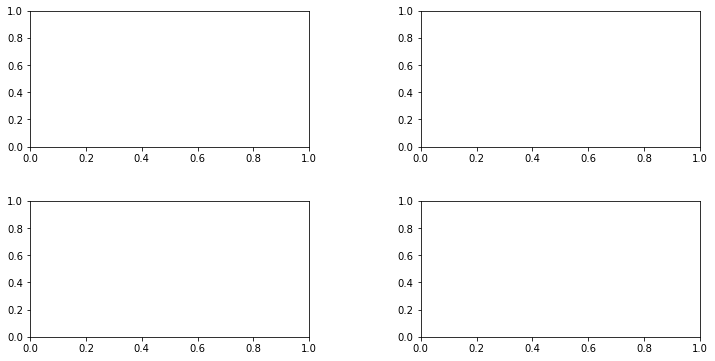

In [18]:
# Create plot
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [19]:
W = svc.final_W
decision_bound = (W.T @ x_test + b_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 69 is different from 30)

### 6. Benchmark against sklearn's SVC

In [20]:
# Compare to sklearn SVC estimator

target = df[1].to_numpy()
features = df.drop(columns=[0, 1]).to_numpy()
features = Normalizer().fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=69)

svc = SVC()
svc.fit(x_train, y_train)
pred_test_skl = svc.predict(x_test)
pred_train_skl = svc.predict(x_train)

test_accuracy_skl = np.mean(pred_test_skl == y_test)
train_accuracy_skl = np.mean(pred_train_skl == y_train)

print(f"Test accuracy: {round(test_accuracy_skl, 3)}")
print(f"Train accuracy: {round(train_accuracy_skl, 3)}")

Test accuracy: 0.913
Train accuracy: 0.902


**Conclusions:** Performance of our SVM is on average roughly in line with sklearn, but it suffers from larger variation in performance (some runs result in quite bad performance, others in very good performance).

### 7. Tuning the penalty parameter C

In [21]:
# Try to find a good value for C

C_values = [100, 500, 1000, 2000, 5000, 10000]

df_shuffled = df.sample(frac=1)
y_data = df_shuffled[1].to_numpy()
x_data = df_shuffled.drop(columns=[0, 1]).to_numpy()
x_data = Normalizer().fit_transform(x_data)

# Dict to store results
c_result_dict = {}

# Loop through all C values
for C in C_values:
    c_result_dict[C] = []
    c_result_temp = []

    # Instantiate model object with parameters
    svc = SupportVectorClassifier(
        solver="SLSQP", penalty=C, max_iter=1000, print_opt_report=False
    )

    # Do 5 train-test for each C
    for i in range(5):

        # Split data
        x_train, x_test, y_train, y_test = train_test_split(
            x_data, y_data, test_size=69
        )

        # Train the model
        svc.fit_model(x_train, y_train)

        # Make predictions on train and test sets
        pred_test = svc.predict(x_test)

        # Calculate accuracy and append result
        test_accuracy = np.mean(pred_test == y_test)
        c_result_temp.append(test_accuracy)

    c_result_dict[C].append(np.mean(c_result_temp))
    c_result_dict[C].append(np.min(c_result_temp))
    c_result_dict[C].append(np.max(c_result_temp))

In [22]:
for key, val in c_result_dict.items():
    print(
        f"C: {key} --> Avg acc: {round(val[0], 3)}, Min acc: {round(val[1], 3)}, Max acc: {round(val[2], 3)}"
    )

C: 100 --> Avg acc: 0.846, Min acc: 0.812, Max acc: 0.899
C: 500 --> Avg acc: 0.893, Min acc: 0.826, Max acc: 0.957
C: 1000 --> Avg acc: 0.881, Min acc: 0.841, Max acc: 0.942
C: 2000 --> Avg acc: 0.861, Min acc: 0.826, Max acc: 0.899
C: 5000 --> Avg acc: 0.928, Min acc: 0.884, Max acc: 0.957
C: 10000 --> Avg acc: 0.832, Min acc: 0.667, Max acc: 0.928


**Conclusion:** 